# Solving the Iris Dataset with Keras
I will be using Tensorflow's high level Keras Layers API for this simple classification machine learning problem that predicts if a flower is an Iris Setosa, Iris Versicolor or an Iris Virginica based on it's sepal length and width and it's petal length and width.

![alt text](https://miro.medium.com/fit/c/1838/551/0*Uw37vrrKzeEWahdB "Logo Title Text 1")

## Imports
First, we make our imports which include Tensorflow to use the Keras Layers API to model the neural network, NumPy for data handling, Pandas to load the data from a CSV file, matplotlib to plot model loss and accuracy, and Scikitlearn to standardize the data and split it into train and test sets.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Loading Data and Data Handling
The data is stored in a csv file and is loaded using Pandas' handy read_csv function. The data happens to have no missing values so we need not deal with that. In order to suit a classification task better, we one-hot encode the unique classes instead of leaving the class as a string with flower's name using Pandas' get_dummies function. Example of one-hot encoding of colors:

![alt text](https://www.machinelearningplus.com/wp-content/uploads/2018/03/one-hot-encoding.png "Logo Title Text 1")

Due to the fact that each input operates on different a scale, we have to standardize all the values in order to make sure the model can easily analyze them. Then the data is split into train and test sets so we can train the model with and then test it on values it's never seen before easily. We can do this swiftly by using Scikitlearn's train_test_split function.

In [ ]:
# load in data with pandas and do some basic data handling
df = pd.read_csv("iris.csv")
y = np.array(pd.get_dummies(df["class"]).values.tolist())

# standardize inputs
sc = StandardScaler()
df.drop("class", axis=1, inplace=True)
x = sc.fit_transform(df)

# split data into train and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

## Defining the Neural Network
Now that the data is ready, we can move on to the network. Using Keras' Layers API, we caneasily do so by adding layers with their dimensions. All layers are initialized with random values meaning the weight and the bias starts with values that are unpredictable. For the hidden layer, there are 7 neurons and the output layer has 3 neurons as that is the number of unique classes. The hidden layer's activation function is ReLU and the output layer's would be Softmax as this is a classification task.

![Softmax Activation Function](https://miro.medium.com/max/3042/1*eqQuFgXPUP5L6J_vVH19wg.png "Logo Title Text 1")

The optimizer used would be Stochastic Graident Descent and fittingly, the function used to calculate the loss of the model at a given epoch would be Categorical Crossentropy.

![Categorical Cross Entropy Loss Function](https://static.packt-cdn.com/products/9781789132212/graphics/1d251b77-d2b9-4945-bb21-949c5cd45a39.png)

In [100]:
# definining neural network that will find a solution to the data
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7, activation="relu", kernel_initializer="random_normal", input_dim=4))
model.add(tf.keras.layers.Dense(3, activation="softmax", kernel_initializer="random_normal"))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

## Training the Network
After training at different epochs, it was found that 1000 epochs was suitable for the model to reach an accuracy of over 95% and a loss that is extremely low meaning that the model as properly fitted itself to the training data.

In [ ]:
# training the model with respect to the data
summary = model.fit(xTrain, yTrain, batch_size=10, epochs=1000)

## Visualizing the Model's Progress
Keras provides a history of the model's losses and accuracies throughout the training epochs it has been through, using the arrays, we can easily plot the data using matplotlib to visualize how the model progressed as it trained to identify when it may have gotten stuck or made tremendous progress.

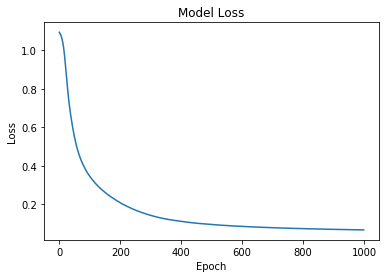

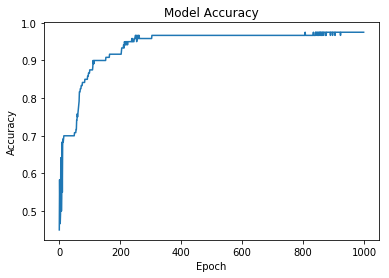

In [102]:
# plotting loss through training
plt.plot(summary.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# plotting accuracy through training
plt.plot(summary.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

As seen from the graphs, the model's loss and accuracy are roughly inversely proportional which indicates the model has learned appropriately.

## Testing the Model
A test set of inputs and outputs were separated from the dataset so we can test the model on data it has never seen before so might as well do it. We measure the accuracy by dividing the number the model got correct by the total number of IO pairs. We do this by comparing the highest number in the output and prediction vectors. If their indices are the same, it means the model has gotten it right. Testing is also important as it proves that the model has generalized it's solution instead of overfitting and "memorizing" the training data.

In [103]:
# testing our model after training
total, correct = 0, 0
for x, yExpec in zip(xTest, yTest):
    x = np.reshape(x, [1, 4])
    yPred = model.predict(x)
    if np.argmax(yExpec) == np.argmax(yPred):
        correct += 1
    total += 1
    
print(f"Accuracy: {correct / total * 100}%")

Accuracy: 100.0%


As seen, the model scored a 100% on the test which suggests that the model has found a good, general solution that can seperate Iris Setosa, Versicolor and Virginica from each other.